# Load Data

In [1]:
DATA_DIR = '../../data'
PLOT_DIR = '../../plots/regression_report'

In [2]:
import json
with open(f'{DATA_DIR}/production_data/site_metadata.json', 'r') as file:
    site_md = json.load(file)

In [3]:
import pandas as pd 

def read_production_data(site_id):
    path = f'{DATA_DIR}/production_data/{site_id}/combination_data'
    df = pd.read_csv(f'{path}/production_weather_combination.csv')
    return df

In [4]:
production_dfs = {}

for site in site_md:
    df = read_production_data(site['id'])
    production_dfs[site['id']] = df 

In [5]:
production_dfs[103941]

,date,precipIntensity,precipProbability,precipAccumulation,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,windGust,cloudCover,uvIndex,visibility,ozone,production
0,2015-02-09 00:00:00-07:00,0.0000,0.00,NaN,NaN,36.80,31.56,33.62,0.88,NaN,6.57,192.0,6.57,0.00,0.0,9.997,NaN,NaN
1,2015-02-09 01:00:00-07:00,0.0000,0.00,NaN,NaN,44.40,44.40,32.76,0.63,NaN,2.65,42.0,3.78,0.00,0.0,9.997,NaN,NaN
2,2015-02-09 02:00:00-07:00,0.0000,0.00,NaN,NaN,44.23,42.70,32.95,0.64,NaN,3.45,44.0,4.28,0.00,0.0,9.997,NaN,NaN
3,2015-02-09 03:00:00-07:00,0.0000,0.00,NaN,NaN,40.92,39.13,32.36,0.71,NaN,3.24,139.0,4.78,0.00,0.0,9.997,NaN,NaN
4,2015-02-09 04:00:00-07:00,0.0000,0.00,NaN,NaN,35.64,30.79,33.74,0.93,NaN,5.69,72.0,5.69,0.00,0.0,9.997,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43358,2020-01-20 19:00:00-07:00,0.0014,0.01,NaN,rain,43.14,36.15,22.09,0.43,1020.7,13.99,70.0,21.45,0.79,0.0,10.000,258.2,NaN
43359,2020-01-20 20:00:00-07:00,0.0014,0.01,NaN,rain,42.20,35.48,21.97,0.44,1021.0,12.38,70.0,21.67,0.85,0.0,10.000,260.5,NaN
43360,2020-01-20 21:00:00-07:00,0.0002,0.01,NaN,rain,42.17,35.56,22.53,0.45,1021.0,12.02,71.0,21.49,0.98,0.0,10.000,262.7,NaN
43361,2020-01-20 22:00:00-07:00,0.0000,0.00,NaN,NaN,41.89,35.22,22.60,0.46,1021.0,11.97,72.0,20.26,0.93,0.0,10.000,264.7,NaN


# Average Monthly production for each different system

In [6]:
plot_data = []

for key, value in production_dfs.items():
    df = value.copy()
    print(f'System: {key}')
    # need to set the index of each data frame to be the date and convert to a datetime object
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, utc=True)
    df = df.set_index('date')
    print('\t Grouping by month')
    grouper = df.groupby(pd.Grouper(freq='M'))
    months = len(grouper.groups) 

    print('\t Resampling by month')
    monthly_df = df.resample('1M').sum()

    avg_monthly = monthly_df['production'].mean()
    avg_monthly *= 0.001

    data = {
        'system_id': str(key),
        'num_months': months, 
        'avg_monthly_production': avg_monthly
    }
    plot_data.append(data)
plot_data

System: 103941
	 Grouping by month
	 Resampling by month
System: 1232644
	 Grouping by month
	 Resampling by month
System: 787197
	 Grouping by month
	 Resampling by month
System: 238320
	 Grouping by month
	 Resampling by month
System: 349060
	 Grouping by month
	 Resampling by month
System: 477834
	 Grouping by month
	 Resampling by month
System: 641826
	 Grouping by month
	 Resampling by month
System: 896164
	 Grouping by month
	 Resampling by month
System: 717193
	 Grouping by month
	 Resampling by month
System: 627759
	 Grouping by month
	 Resampling by month
System: 569932
	 Grouping by month
	 Resampling by month
System: 466851
	 Grouping by month
	 Resampling by month
System: 256177
	 Grouping by month
	 Resampling by month
System: 505347
	 Grouping by month
	 Resampling by month


[{'system_id': '103941',
  'num_months': 60,
  'avg_monthly_production': 343.13925760729535},
 {'system_id': '1232644',
  'num_months': 6,
  'avg_monthly_production': 246.59900000000002},
 {'system_id': '787197',
  'num_months': 19,
  'avg_monthly_production': 550.9694210526316},
 {'system_id': '238320',
  'num_months': 20,
  'avg_monthly_production': 247.00039874864254},
 {'system_id': '349060',
  'num_months': 38,
  'avg_monthly_production': 324.26031578947374},
 {'system_id': '477834',
  'num_months': 33,
  'avg_monthly_production': 45.220757575757574},
 {'system_id': '641826',
  'num_months': 24,
  'avg_monthly_production': 1159.4569166666668},
 {'system_id': '896164',
  'num_months': 15,
  'avg_monthly_production': 234.67986666666667},
 {'system_id': '717193', 'num_months': 22, 'avg_monthly_production': 2002.371},
 {'system_id': '627759',
  'num_months': 25,
  'avg_monthly_production': 909.82344},
 {'system_id': '569932',
  'num_months': 28,
  'avg_monthly_production': 1013.438535

In [7]:
plot_df = pd.DataFrame(plot_data)
plot_df

,system_id,num_months,avg_monthly_production
0,103941,60,343.139258
1,1232644,6,246.599000
2,787197,19,550.969421
3,238320,20,247.000399
4,349060,38,324.260316
5,477834,33,45.220758
6,641826,24,1159.456917
7,896164,15,234.679867
8,717193,22,2002.371000
9,627759,25,909.823440


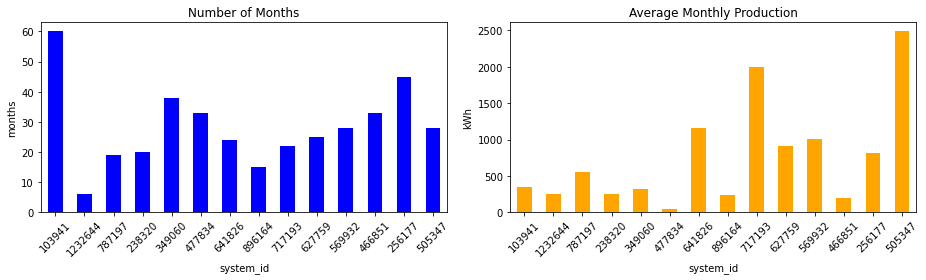

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
axes[0].set_ylabel('months')
axes[0].set_title('Number of Months')
axes[1].set_ylabel('kWh')
axes[1].set_title('Average Monthly Production')
plot_df.plot.bar(x='system_id', y='num_months', ax=axes[0], color='blue')
plot_df.plot.bar(x='system_id', y='avg_monthly_production', ax=axes[1], color='orange')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
plt.savefig(f'{PLOT_DIR}/2-1.png')

# axes = plot_df.plot.bar(x='system_id', subplots=True, rot=0)
# axes

# Results 

# RMSE for a few systems
We want to compare the RMSE of a few different systems. We'll pick 1232644, 103941, 717193, and 569932. These were chosen by hand as a somewhat representive subset of the data. We want to first pull in the results from the models. 

In [89]:
results_df = pd.read_csv('../LinearRegression/Irradiance_results.csv')
results_df = results_df.astype({'site_id': str})
results_df = results_df.rename(columns={
    'irradiance_only': 'IR',
    'irr_time': 'IR + T', 
    'weather_only': 'W', 
    'weather_time': 'W + T', 
    'weather_irr': 'W + IR', 
    't_loo': 'Z', 
    't_integrated': 'INT', 
    'all': "All"
})
results_df = results_df.set_index('site_id')

In [90]:
site_ids = ['896164', '103941', '717193', '569932']
plot_df = results_df.loc[site_ids]
plot_df = plot_df.drop(columns=['T_LOO', 'T_INT'])

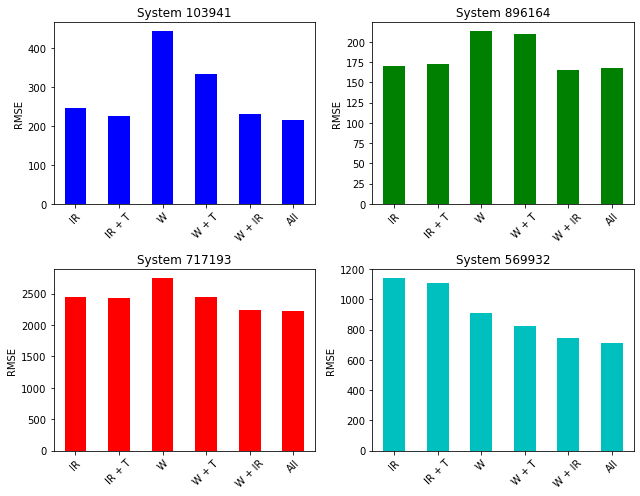

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,7))
series1 = plot_df.loc['103941']
series2 = plot_df.loc['896164']
series3 = plot_df.loc['717193']
series4 = plot_df.loc['569932']
sites = [series1, series2, series3, series4]
colors = ['b', 'g', 'r', 'c']
idx = 0
for i in range(2):
    for j in range(2):
        s = sites[idx]
        c = colors[idx]
        site_id = s.name
        ax = axes[i][j]
        s.plot.bar(ax = ax, color=c)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.set_ylabel('RMSE')
        ax.set_title(f'System {site_id}')
        # plt.xticks(rotation=90)
        idx +=1
fig.tight_layout()
plt.savefig(f'{PLOT_DIR}/4-1.png')
# series.plot.bar()

In [56]:
results_df = pd.read_csv('../LinearRegression/Irradiance_results_norm.csv')
results_df = results_df.astype({'site_id': str})
results_df = results_df.rename(columns={
    'irradiance_only': 'IR',
    'irr_time': 'IR + T', 
    'weather_only': 'W', 
    'weather_time': 'W + T', 
    'weather_irr': 'W + IR', 
})
results_df = results_df.set_index('site_id')

In [57]:
site_ids = ['896164', '569932']
plot_df = results_df.loc[site_ids]

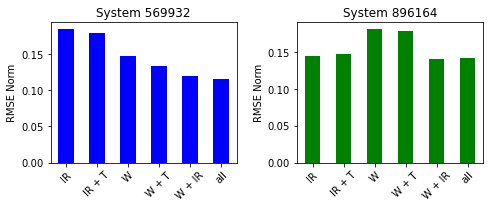

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
series1 = plot_df.loc['569932']
series2 = plot_df.loc['896164']
sites = [series1, series2, series3, series4]
colors = ['b', 'g']
idx = 0
for i in range(2):
    s = sites[idx]
    c = colors[idx]
    site_id = s.name
    ax = axes[i]
    s.plot.bar(ax = ax, color=c)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylabel('RMSE Norm')
    ax.set_title(f'System {site_id}')
    # plt.xticks(rotation=90)
    idx +=1
fig.tight_layout()
plt.savefig(f'{PLOT_DIR}/rmse_norm.png')
# series.plot.bar()

## Average difference in RMSE 
I want to produce a simple graph that shows the average difference for each category against the weather category. That is, take the difference of each category from weather as a percentage, and then average that percentage and produce a plot. 

In [92]:
results_df

,IR,IR + T,W,W + T,W + IR,All,T_LOO,T_INT
site_id,,,,,,,,
103941,246.534541,225.476615,443.820703,333.608607,230.734887,214.282454,1408.297236,962.852813
787197,458.741006,441.875406,676.095814,493.189830,420.689423,414.346982,1139.275025,1051.837168
238320,406.768778,400.295024,215.158797,194.184444,180.539331,179.062503,1216.435500,1046.116332
349060,195.153020,195.418662,366.227301,277.764976,173.514858,172.418634,1063.147773,906.907098
477834,185.225738,182.273051,180.990243,165.603927,146.007381,141.265141,1084.975457,1027.294537
641826,1415.125092,1356.645292,1400.275253,1340.890427,1129.709809,1074.484228,1892.605357,1740.671072
896164,169.821445,173.107516,213.166462,209.297813,165.401586,166.997995,977.995193,936.944873
717193,2452.825849,2423.531521,2755.743480,2454.798066,2235.588756,2228.444875,3167.109357,3074.459545
627759,661.845473,562.320608,1158.978721,830.920466,604.447385,553.548312,987.753050,943.862437


In [93]:
def perc_diff(var, weather):
    diff = weather - var
    return diff / weather

def apply_func(row):
    for idx in row.index: 
        if idx != 'W':
            row[idx] = perc_diff(row[idx], row['W'])
    row['W'] = perc_diff(row['W'], row['W'])
    return row

difference_df = results_df.copy()
difference_df = difference_df.apply(apply_func, axis=1)
difference_df

,IR,IR + T,W,W + T,W + IR,All,T_LOO,T_INT
site_id,,,,,,,,
103941,0.444518,0.491965,0.0,0.248326,0.480117,0.517187,-2.173122,-1.169463
787197,0.321485,0.346431,0.0,0.270533,0.377767,0.387148,-0.685079,-0.555752
238320,-0.890551,-0.860463,0.0,0.097483,0.160902,0.167766,-4.653664,-3.862066
349060,0.467126,0.466401,0.0,0.241550,0.526210,0.529203,-1.902972,-1.476350
477834,-0.023402,-0.007088,0.0,0.085012,0.193286,0.219488,-4.994663,-4.675966
641826,-0.010605,0.031158,0.0,0.042409,0.193223,0.232662,-0.351595,-0.243092
896164,0.203339,0.187923,0.0,0.018148,0.224073,0.216584,-3.587941,-3.395367
717193,0.109922,0.120553,0.0,0.109207,0.188753,0.191345,-0.149276,-0.115655
627759,0.428941,0.514814,0.0,0.283058,0.478466,0.522383,0.147738,0.185608


In [96]:
avg = difference_df.mean()
avg = avg.drop(['W', 'T_LOO', 'T_INT'])
avg

IR        0.101991
IR + T    0.143764
W + T     0.160225
W + IR    0.296650
All       0.325181
dtype: float64

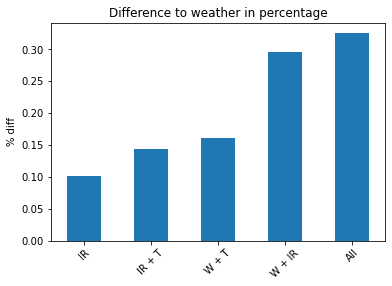

In [97]:
avg.plot.bar() 
plt.ylabel('% diff')
plt.title('Difference to weather in percentage')
plt.xticks(rotation=45)
plt.savefig(f'{PLOT_DIR}/4-2.png')

Define M as a set containing all the models and S as a set containing all of the system id's.  $$M = \{IR, IR+T, W+T, W+IR, all\}, S = \{103941, 787197, ...\}$$. We also define RMSE(S, M) as a function that will obtain the RMSE value from the table. Then define PercDiff(M) as $$PercDiff(M) = \frac{1}{\vert S \vert}\sum_{s \in (S - \{W\})} RMSE('W', M) - RMSE(s, M) $$

In [98]:
avg = difference_df.mean()
avg = avg.drop(['W', 'IR + T', 'W + T', 'IR', 'W + IR'])
avg

All      0.325181
T_LOO   -1.730143
T_INT   -1.359661
dtype: float64

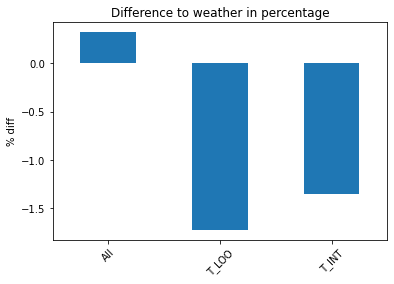

In [99]:
avg.plot.bar() 
plt.ylabel('% diff')
plt.title('Difference to weather in percentage')
plt.xticks(rotation=45)
plt.savefig(f'{PLOT_DIR}/4-3.png')